# Driver Drowsiness Detection:

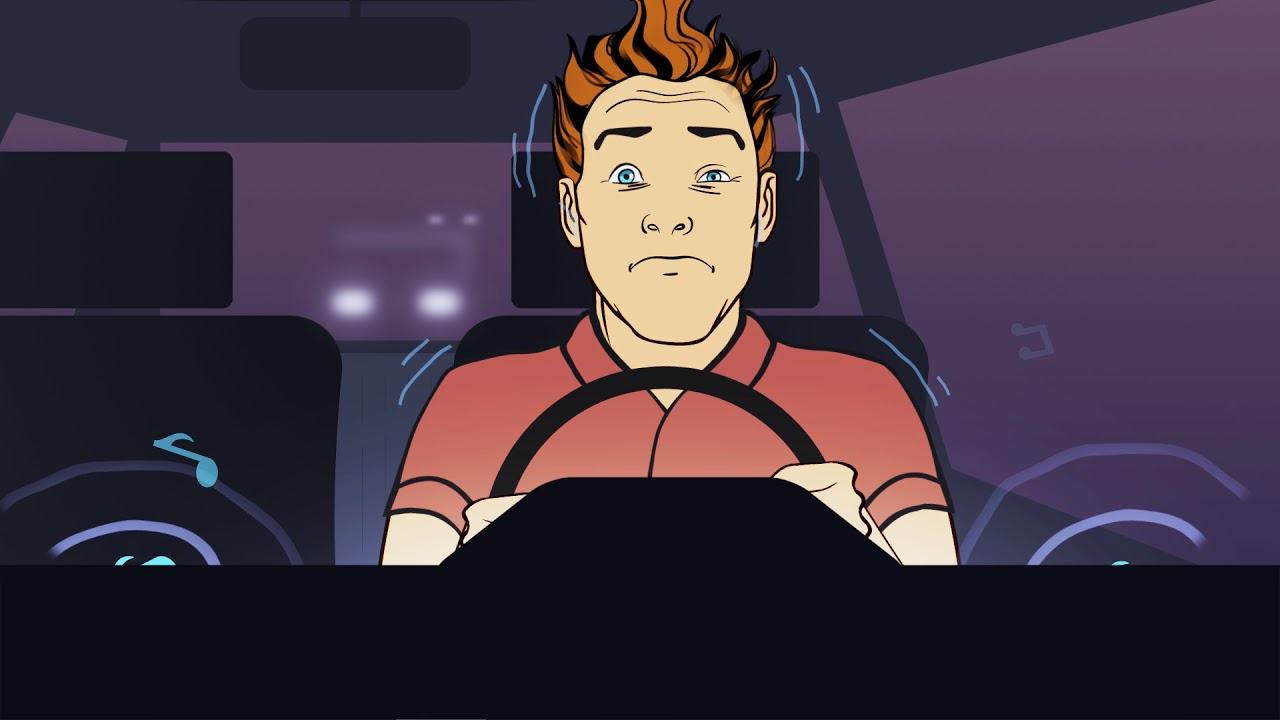

In [1]:
from IPython.display import Image
Image(filename="driver.jpg")

### Aim:

     To detect and alert users,when their eyes is drowsy.This can be used by riders who tend to drive for a longer period of time that may lead to accidents.
     
### Requirements:

    Webcam,scipy,imutils,dlibs,opencv 

In [2]:
# Imports
from scipy.spatial import distance   #library for distance computations
from imutils import face_utils       
#Imutils are a series of convenience functions to make basic image processing functions such as translation, rotation, 
#resizing, skeletonization, and displaying Matplotlib images easier with OpenCV
import imutils
import dlib #Dlib is a modern C++ toolkit containing machine learning algorithms and tools for creating complex software in C++
import cv2  #opencv module

###  Eye aspect ratio:
     In Real Time Eye Blinking Using Facial Landmarks, Soukupová and Čech derive an equation that represents the Eye Aspect Ratio. The Eye Aspect Ratio is an estimate of the eye opening state.“The Eye Aspect Ratio is a constant value when the eye is open, but rapidly falls to 0 when the eye is closed.

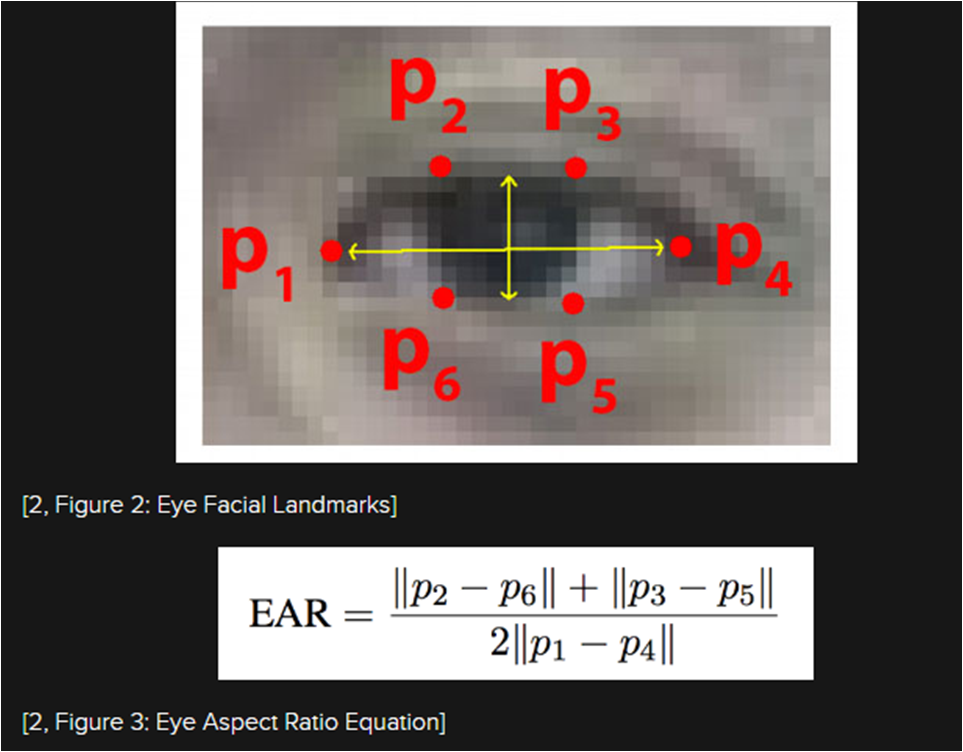

In [3]:
from IPython.display import Image
Image(filename="eyecordinate.png")  #reference https://hackaday.io/project/27552-blinktotext/log/68360-eye-blink-detection-algorithms

### Eye Aspect Ratio vs Time:

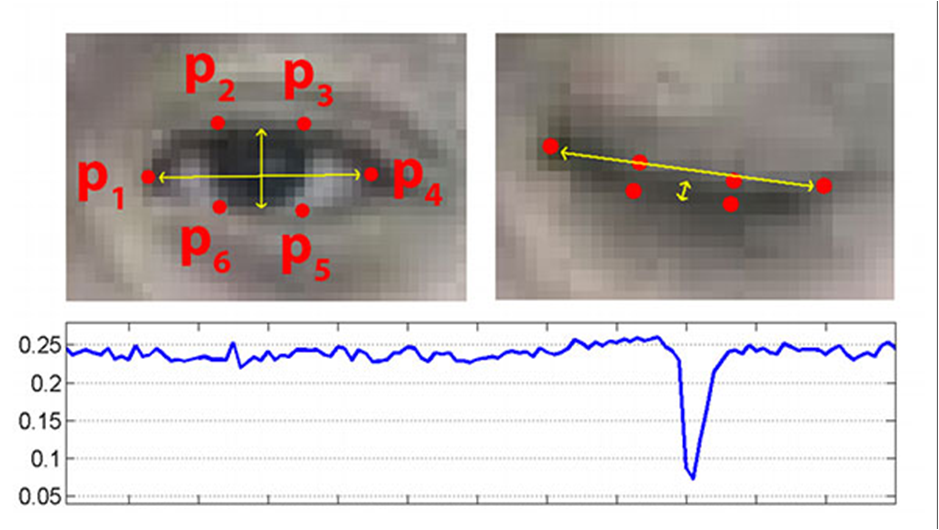

In [4]:
from IPython.display import Image
Image(filename="eatime.png")

In [5]:
# function to determine eye aspect ratio
def eye_aspect_ratio(eye):
    A = distance.euclidean(eye[1], eye[5])
    B = distance.euclidean(eye[2], eye[4])
    C = distance.euclidean(eye[0], eye[3])
    ear = (A + B) / (2.0 * C)
    return ear    # returns aspect ratio 

### Drowsiness condition check:
     It checks 20 consecutive frames and if the Eye Aspect ratio is lesst than 0.25, Alert is generated.

In [6]:
thresh = 0.25  
framecheck = 20

In [7]:
detect = dlib.get_frontal_face_detector() #Returns the default face detector
predict = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat") 
#landmark’s facial detector with pre-trained models, the dlib is used to estimate the location of 68 coordinates (x, y) that map the facial points on a person’s face 

### Facial landmarks example 

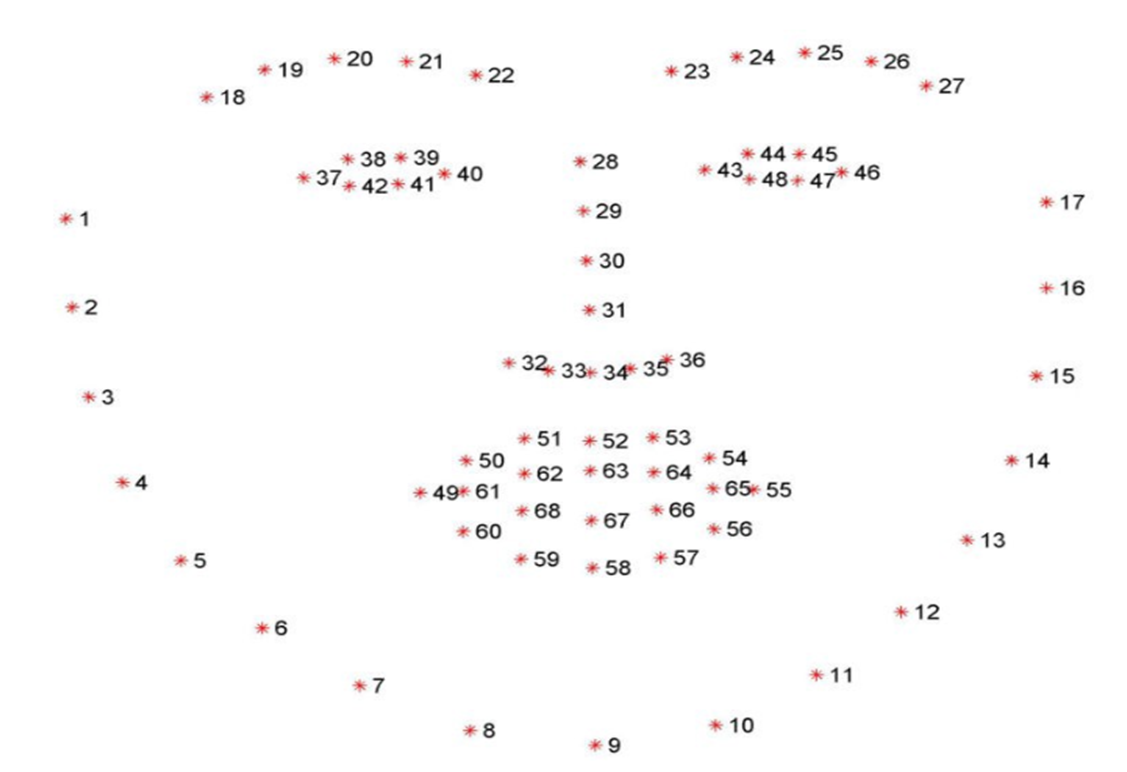

In [8]:
from IPython.display import Image
Image(filename="faciallandmarks.png")

In [9]:
(lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]    #finding co-ordinates of left and right eye
(rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]

### Detector:

In [10]:
cap = cv2.VideoCapture(0)       #capturing video through webcam(indicated by 0)
flag = 0
while True:
    ret, frame=cap.read()
    frame = imutils.resize(frame, width=450)  #resizing frame
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) #For BGR \rightarrow Gray conversion we use the flags cv2.COLOR_BGR2GRAY
    subjects = detect(gray, 0) #detect faces in the grayscale frame
    for subject in subjects:
        shape = predict(gray, subject)
        shape = face_utils.shape_to_np(shape)#converting to NumPy Array
        leftEye = shape[lStart:lEnd]        #finding eye co-ordinates
        rightEye = shape[rStart:rEnd]
        leftEAR = eye_aspect_ratio(leftEye) #finding eye aspect ratio for left and right eye
        rightEAR = eye_aspect_ratio(rightEye)
        ear = (leftEAR + rightEAR) / 2.0   #average for both eyes
        leftEyeHull = cv2.convexHull(leftEye)
        rightEyeHull = cv2.convexHull(rightEye)
        #Hull means the exterior or the shape of the object. 
        #Therefore, the Convex Hull of a shape or a group of points is a tight fitting convex boundary around the points or the shape. 
        cv2.drawContours(frame, [leftEyeHull], -1, (0, 255, 0), 1)
        cv2.drawContours(frame, [rightEyeHull], -1, (0, 255, 0), 1) #countours on both eyes
        #checking condition
        if ear < thresh:
            flag += 1
            if flag >= framecheck:
                cv2.putText(frame, "****************ALERT!****************", (10, 30),   # text display
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
                cv2.putText(frame, "****************WAKE UP!****************", (10,325),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        else:
            flag = 0
    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF
    if key == ord("q"):                 #destroying windows when user hits q
        cv2.destroyAllWindows()
        cap.release()
        break    

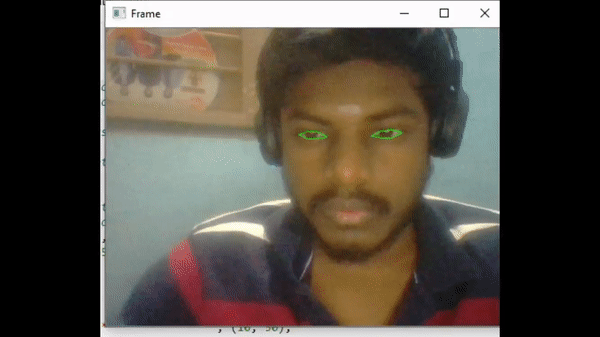

In [11]:
from IPython.display import Image
Image(filename="drowsy.gif")